In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre_data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingGermany.csv")
Pre_data

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
0,7234,2015-10-05,Germany,52.473201,13.447998,2.0,1.0,1.0,1.0,30.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,10
1,7235,2015-09-14,Germany,52.570491,13.311876,2.0,1.0,1.0,1.0,24.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,9
2,7236,2014-03-14,Germany,52.495591,13.295928,2.0,2.0,0.0,2.0,100.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,3
3,7237,2012-01-06,Germany,52.498321,13.292503,2.0,1.0,1.0,2.0,29.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,1
4,7238,2016-02-27,Germany,52.498843,13.290058,2.0,1.0,1.0,1.0,65.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16171,494949,2014-05-18,Germany,52.563218,13.341143,3.0,1.0,1.0,2.0,49.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,5
16172,494950,2016-11-28,Germany,52.550743,13.341502,2.0,1.0,1.0,1.0,36.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,11
16173,494951,2016-09-03,Germany,52.543364,13.349606,2.0,1.0,1.0,1.0,22.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5,9
16174,494952,2015-04-14,Germany,52.550551,13.339338,1.0,1.0,1.0,1.0,20.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,4


<AxesSubplot:ylabel='Frequency'>

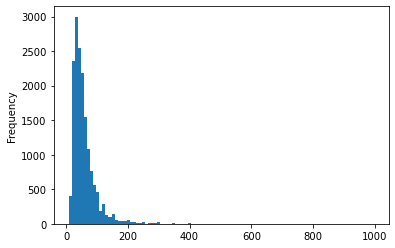

In [33]:
Pre_data['Price'].plot(kind='hist', bins=100)

In [2]:
Pre_data['group'] = pd.cut(x=Pre_data['Price'],
bins=[0, 50, 100, 150, 200, 1000],
labels=['group_1','group_2','group_3','group_4','group_5'])
Pre_data.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month,group
0,7234,2015-10-05,Germany,52.473201,13.447998,2.0,1.0,1.0,1.0,30.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,10,group_1
1,7235,2015-09-14,Germany,52.570491,13.311876,2.0,1.0,1.0,1.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,9,group_1
2,7236,2014-03-14,Germany,52.495591,13.295928,2.0,2.0,0.0,2.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,3,group_2
3,7237,2012-01-06,Germany,52.498321,13.292503,2.0,1.0,1.0,2.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,1,group_1
4,7238,2016-02-27,Germany,52.498843,13.290058,2.0,1.0,1.0,1.0,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,2,group_2


In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Pre_data, Pre_data["group"]):
    train = Pre_data.loc[train_index]
    test = Pre_data.loc[test_index]

In [4]:
train['group'].value_counts() / len(train)

group_1    0.588253
group_2    0.328362
group_3    0.055255
group_4    0.015533
group_5    0.012597
Name: group, dtype: float64

In [5]:
test['group'].value_counts() / len(test)

group_1    0.588381
group_2    0.328492
group_3    0.055315
group_4    0.015451
group_5    0.012361
Name: group, dtype: float64

In [6]:
train.drop('group', axis=1, inplace=True)
train.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
6982,220886,2014-08-22,Germany,52.487407,13.428029,2.0,1.0,1.0,1.0,67.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,8
1145,18616,2016-08-17,Germany,52.506874,13.315878,5.0,1.5,1.0,2.0,115.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,8
1331,20628,2016-12-08,Germany,52.554238,13.386506,2.0,1.0,1.0,1.0,35.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,12
7337,223931,2013-01-14,Germany,52.508201,13.391097,4.0,1.0,2.0,4.0,100.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
257,7593,2014-11-10,Germany,52.468231,13.486448,2.0,1.0,1.0,1.0,45.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,11


In [7]:
test.drop(['Unnamed: 0','group', 'Host Since', 'Country', 'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
test.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
2193,52.511502,13.319673,2.0,1.0,1.0,1.0,40.0,1.0,0.0,1.0,1125.0,5.0,0.0,1.0,0.0,1,9
5497,52.494546,13.365782,2.0,1.0,1.0,1.0,50.0,1.0,10.0,2.0,30.0,1.0,1.0,0.0,0.0,2,4
10367,52.492726,13.426989,2.0,1.0,1.0,1.0,40.0,1.0,0.0,2.0,1125.0,6.0,1.0,0.0,0.0,2,9
12552,52.520114,13.317078,2.0,1.0,1.0,1.0,49.0,1.0,0.0,3.0,7.0,11.0,1.0,0.0,0.0,6,10
3673,52.533998,13.428003,2.0,1.0,1.0,1.0,52.0,2.0,0.0,1.0,1125.0,11.0,0.0,1.0,0.0,4,9


In [8]:
train_y = train[['Price']]
train_y.head()

,Price
6982,67.0
1145,115.0
1331,35.0
7337,100.0
257,45.0


In [9]:
train.drop(['Unnamed: 0', 'Price', 'Host Since', 'Country','Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
train_X = train
train_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
6982,52.487407,13.428029,2.0,1.0,1.0,1.0,1.0,18.0,3.0,1125.0,11.0,1.0,0.0,0.0,4,8
1145,52.506874,13.315878,5.0,1.5,1.0,2.0,4.0,15.0,2.0,14.0,3.0,0.0,1.0,0.0,2,8
1331,52.554238,13.386506,2.0,1.0,1.0,1.0,1.0,0.0,2.0,6.0,2.0,1.0,0.0,0.0,3,12
7337,52.508201,13.391097,4.0,1.0,2.0,4.0,1.0,0.0,3.0,1125.0,68.0,1.0,0.0,0.0,0,1
257,52.468231,13.486448,2.0,1.0,1.0,1.0,1.0,12.0,1.0,1125.0,12.0,0.0,1.0,0.0,0,11


In [10]:
test_y= test[['Price']]
test_y.head()

,Price
2193,40.0
5497,50.0
10367,40.0
12552,49.0
3673,52.0


In [11]:
test.drop('Price', axis=1, inplace=True)
test_X = test
test_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
2193,52.511502,13.319673,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1125.0,5.0,0.0,1.0,0.0,1,9
5497,52.494546,13.365782,2.0,1.0,1.0,1.0,1.0,10.0,2.0,30.0,1.0,1.0,0.0,0.0,2,4
10367,52.492726,13.426989,2.0,1.0,1.0,1.0,1.0,0.0,2.0,1125.0,6.0,1.0,0.0,0.0,2,9
12552,52.520114,13.317078,2.0,1.0,1.0,1.0,1.0,0.0,3.0,7.0,11.0,1.0,0.0,0.0,6,10
3673,52.533998,13.428003,2.0,1.0,1.0,1.0,2.0,0.0,1.0,1125.0,11.0,0.0,1.0,0.0,4,9


In [12]:
# from sklearn.linear_model import LinearRegression

# l_reg = LinearRegression()
# l_reg.fit(train_X, train_y)

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# predictions = l_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [14]:
# predictions = l_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [15]:
# from sklearn.tree import DecisionTreeRegressor

# d_reg = DecisionTreeRegressor()
# d_reg.fit(train_X, train_y)

In [16]:
# predictions = d_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [17]:
# predictions = d_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [18]:
# from sklearn.svm import SVR

# svr = SVR()
# svr.fit(train_X, train_y)

In [19]:
# predictions = svr.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [20]:
# predictions = svr.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [21]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor()
# knn.fit(train_X, train_y)

In [22]:
# predictions = knn.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [23]:
# predictions = knn.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [24]:
# from sklearn.neural_network import MLPRegressor

# ann = MLPRegressor()
# ann.fit(train_X, train_y)

In [25]:
# predictions = ann.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [26]:
# predictions = ann.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [27]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_17108/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


RandomForestRegressor()

Text(0.5, 0, 'Relative Importance')

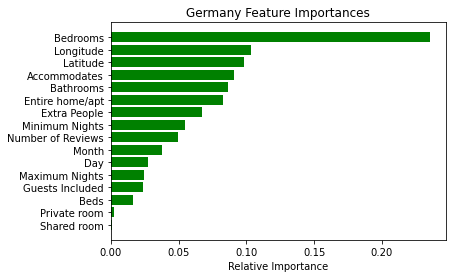

In [28]:
features = train_X.columns
importances = r_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Germany Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [29]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

124.99228261205565 11.179994750090701 6.1373786707882525


In [30]:
# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators' : [800,900,1000], 'max_features' : ['sqrt','auto','log2'], 'max_depth' : [8,9,10],
#          'min_samples_split': [2,3,4]}

# r_reg = RandomForestRegressor(random_state=42)

# search = GridSearchCV(r_reg, param, cv=5,
#                       scoring='neg_mean_absolute_error')
                      
# search.fit(train_X, train_y['Price'].ravel())

In [31]:
# from sklearn.ensemble import RandomForestRegressor

# r_reg = RandomForestRegressor(bootstrap=True,
#                               min_samples_split=2,
#                               criterion='mse',
#                               max_depth=None,
#                               max_features='auto',
#                               n_estimators=1000,
#                               random_state=42,
#                               )
# r_reg.fit(train_X, train_y['Price'].ravel())

In [32]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)